## Final Project Submission

Please fill out:
* Student name: PERPETUAL ANN KARAPUNA
* Student pace:PART TIME
* Scheduled project review date/time: 16TH APRIL 2023
* Instructor name: 
* Blog post URL:


# Microsoft Studio Analysis.
This analysis aims at deriving useful insights from data provided to help Microsoft studio understand the best films to create. The Analysis looks at various factors such as movie ratings and audience votes to see the most popular movies and understand the income the different genres generate. We will follow a couple of steps that have been broken down in our notebook

 <b>STEP 1</b>: Load Data from the IMB Database.

In [68]:
#import the right libraries to be used in this analysis
import pandas as pd
import sqlite3
#The above libraries are the main libraries to be used inour analysis
#The ones that follow are meant to help us in the extraction of the data from the zipped file from the repository in github
import requests #Used to download the db from the url;in this case our zipped Data in the repo 
import io #Creates a file after extraction of the db
import zipfile
import matplotlib.pyplot as plt
import csv

Now that we have a list of libraries we're going to use... we need to load our data here. Our data is in a Database which is in Zipped format. In the cell below, we will download the zipped IMDB file and extract it from a zipfile so that we can use it. Here's a bulleted summary of what we will do in this cell:
-  Download and extract the SQL database file
-  Create a DB connection
-  Create our cursor that will help us in executing different commands
-  Create a Dataframe for the data we select from the SQLITE Data base
-  Display a few rows of the df

__LET'S GO!__

In [76]:
#load the csv data into a pd
csv_file_path = r'C:\Users\hp\OneDrive\Desktop\bom.movie_gross.csv'
movies_gross_df= pd.read_csv(csv_file_path)
movies_gross_df.head(5)

,primary_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [2]:
#Get the url where the zipData is.
imdb_url= 'https://github.com/learn-co-curriculum/dsc-phase-1-project-v2-4/raw/master/zippedData/im.db.zip'
response = requests.get(imdb_url)
imdb_zip_file = zipfile.ZipFile(io.BytesIO(response.content))

#Extract the database file from the above downloaded file
imdb_extracted_file = imdb_zip_file.extract(imdb_zip_file.namelist()[0])

# Connect to the extracted SQLite database
conn = sqlite3.connect(imdb_extracted_file)

# Create a cursor object to interact with the database
cursor = conn.cursor()

#fetch data from the movie basics
cursor.execute('SELECT * FROM movie_basics')
rows = cursor.fetchall()

# Create a dataframe from the fetched data
df = pd.DataFrame(rows)

#Add colimn names to our df
column_names = [column[0] for column in cursor.description]
df.columns = column_names

cursor.close()
conn.close()
#Display the dataframe
df.head(10)



,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


__Perfect!__ We have been able to fetch the data from the movies_basics table in our SQLite Database.
Now we want to select the data from the movie_ratings table... This data is also useful in our analysis. 
We will repeate the above fetch process and we will load it to a new data frame __df2__. See the cell belows

In [3]:
# Connect to the extracted SQLite database
conn = sqlite3.connect(imdb_extracted_file)

# Create a cursor object to interact with the database
cursor = conn.cursor()

#fetch data from the movie basics
cursor.execute('SELECT * FROM movie_ratings')
rows = cursor.fetchall()

# Create a dataframe from the fetched data
df2 = pd.DataFrame(rows)

#Add colimn names to our df
column_names = [column[0] for column in cursor.description]
df2.columns = column_names

cursor.close()
conn.close()
#Display the dataframe
df2.head(10)


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


__STEP 2:__ Lets prepare and clean our Data

In [4]:
#This cell finds the shape of the first dataframe we created(movie_basics)
df_shape= df.shape
df_shape

(146144, 6)

In [5]:
#This cell finds the shape of the second dataframe we created(movie_ratings)
df2_shape = df2.shape
df2_shape

(73856, 3)

Working in separate dataframes can be inefficient. To avoid the back and forth of having to use the data frames separately, we will have to combine the two data frame into one using __.merge__ method. 

In [6]:
movies_df= pd.merge(df, df2, on='movie_id', how='inner')
movies_df.head(5)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [7]:
# whats the shape of our movies_df?
movies_df_shape= movies_df.shape
movies_df_shape

(73856, 8)

From the 5 rows displayed in the movies_df, we can see that there are some NaN Values... Lets see the dataframe info to understand more about the NaN Values

In [8]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


Our data has a few NaNs, at the Runtime_minutes and genres columns. Since They are not many NaNs we can get rid of those rows to remain with data that is complete 

In [9]:
movies_df =movies_df.dropna(subset=['runtime_minutes'])
movies_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...,...
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


In [10]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66236 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         66236 non-null  object 
 1   primary_title    66236 non-null  object 
 2   original_title   66236 non-null  object 
 3   start_year       66236 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    66236 non-null  float64
 7   numvotes         66236 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [11]:
#Remove the rows with null in the genre column
movies_df =movies_df.dropna(subset=['genres'])
movies_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...,...
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


In [12]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


Our Data is now all set for analysis. We've cleaned it up. Lets see a summary of the statistical measures of the different columns

In [13]:
movies_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,65720.000000,65720.000000,65720.000000,6.572000e+04
mean,2014.258065,94.732273,6.320902,3.954674e+03
std,2.600143,209.377017,1.458878,3.208823e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.200000e+01
75%,2016.000000,104.000000,7.300000,3.520000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


__STEP 3:__ DATA ANALYSIS

In this section we will analyse the data to come up with useful insights for Microsoft Studio. Our data has different aspects that can be analysed to provide feedback that can be useful to the company before this great venture.
- Analyse the distribution of genres to understand the most popular genre in the movies industry
- Analyse the trend of movie release over the years
- Dig deeper into the ratings and corresponding votes to see which movies have high audience reception

__1. Analysis of the Genre Distribution__

In this secion we will analyse the frequency of the genres in the data given as well as see the most and least popular genre in the data. This information will enable us to give Microsoft Studio insightful information on the movies best recieved by the audience

In [14]:
#lets find the frequency of each genre in our data by getting the genre counts in the df
genres_num= movies_df['genres'].value_counts()
genres_num

Drama                      10189
Documentary                 9149
Comedy                      4604
Comedy,Drama                2451
Horror                      2232
                           ...  
Crime,Drama,News               1
Action,Crime,Music             1
Adventure,Crime,Romance        1
Comedy,Sci-Fi,Sport            1
Drama,Music,News               1
Name: genres, Length: 906, dtype: int64

In [15]:
#the most common genre is
most_popular_genre = genres_num.head(1).index[0]
most_popular_genre

'Drama'

In [16]:
#least pospular genre
least_popular_genre = genres_num[genres_num == 1]
least_popular_genre2= []
least_popular_genre2.append(least_popular_genre)
least_popular_genre2

[Comedy,History,Romance        1
 Animation,Sci-Fi,War          1
 Adventure,Mystery,Romance     1
 Comedy,Horror,War             1
 Documentary,Family,Mystery    1
                              ..
 Crime,Drama,News              1
 Action,Crime,Music            1
 Adventure,Crime,Romance       1
 Comedy,Sci-Fi,Sport           1
 Drama,Music,News              1
 Name: genres, Length: 218, dtype: int64]

In [17]:
#lets find the top 5 most popular genres and add them to a list

top_popular_genre = genres_num.head(5).index.tolist()
top_popular_genre

['Drama', 'Documentary', 'Comedy', 'Comedy,Drama', 'Horror']

In [18]:
# lets find the top 5 frequencies and add them to a separate list
top_gen_freq = genres_num.head(5).tolist()
top_gen_freq


[10189, 9149, 4604, 2451, 2232]

From the above analysis, we have discovered that the most popular genre in the movie industry is 'Drama'... We will use this finding to come up with a bar chart that shows the distribution of genres.

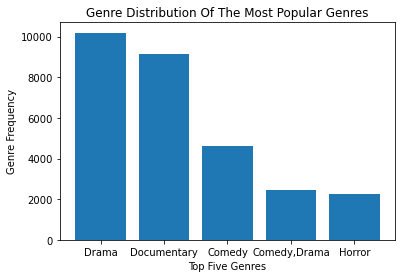

In [19]:
#matplotlip has already been importe in the 1st cell

plt.bar(top_popular_genre, top_gen_freq)
plt.xlabel('Top Five Genres')
plt.ylabel('Genre Frequency')
plt.title('Genre Distribution Of The Most Popular Genres')

plt.show()

__2. Ratings and Votes Analysis__

In this section, we will analysie the ratings according to the genre. Since our analysis is aimed at providing Microsoft Studio with insights on the best movies to produce, I'd like to think that genres are of great help. Getting the average ratings across the genres will enable us to compare the ratings given to the different genres

In [29]:
#Lets find the average of all the ratings in each genre
#to achieve this, we will usea for loop that iterates over the genres to find the average ratings

#create an empty list
genres_average_rating= []

#itarate over the genre column

for genres in movies_df['genres'].unique():
    #see the movies in the current genre only
    genres_current= movies_df[movies_df['genres'] == genres]
    
    #calculate the sum of rating of the movies
    ratings_sum= genres_current['averagerating'].sum()
    number_of_movies= len(genres_current)
    #calculate the mean of ratings in each genre
    average_rating = ratings_sum/ number_of_movies
    
    genres_average_rating.append((genres, average_rating))
    
#lets sort them in descending order
average_rating_list= sorted(genres_average_rating, key=lambda x: x[1], reverse=True)
    
average_rating_list[:5]

[('Comedy,Documentary,Fantasy', 9.4),
 ('Documentary,Family,Musical', 9.3),
 ('Game-Show', 9.0),
 ('Documentary,News,Reality-TV', 8.8),
 ('Documentary,News,Sport', 8.8)]

Now we will find the corresponding votes in each genre... This will allow us to see the realtionship between the votes and the corresponding ratings in each genre

In [35]:
#create an empty list
genres_votes = []

#iterate over the  genre to find total votes
for genres in movies_df['genres'].unique():
    #see the movies in the current genre only
    genres_current_movie= movies_df[movies_df['genres'] == genres]
    
    #calculate number of votes
    total_genres_votes= genres_current_movie['numvotes'].sum()
    
    genres_votes.append((genres,total_genres_votes))
    
genre_votes_list= sorted(genres_votes, key=lambda x: x[1], reverse=True)
    
genre_votes_list[:5]

[('Action,Adventure,Sci-Fi', 23023053),
 ('Action,Adventure,Fantasy', 9658805),
 ('Adventure,Animation,Comedy', 8687201),
 ('Drama', 8342370),
 ('Comedy,Drama,Romance', 7662618)]

We can see that the top rated movie genres do not appear in the top 5 average votes list.So to make this analysis more meaningful... we will look for the ten most popular genres(from __1.Analyse Genres__) then we will find their corresponding ratings and number of votes. ##But before we do that... it is important to note that high movie ratings dont necessarily equate to movie popularity since we have seen that from the above output

In [122]:
#find the top 10 most popular genres
top_10_popular_genres = genres_num.head(10).index.tolist()
top_10_popular_genres

['Drama',
 'Documentary',
 'Comedy',
 'Comedy,Drama',
 'Horror',
 'Drama,Romance',
 'Thriller',
 'Comedy,Drama,Romance',
 'Comedy,Romance',
 'Horror,Thriller']

In [119]:
#lets create a list of the average ratings that corresponds to the above top_20_popular ratings
average_ratings_top_10 = []

# Iterate over the genres and retrieve average ratings for top 20 genres
for genre in genres_average_rating:
    if genre[0] in top_10_popular_genres:
        average_ratings_top_10.append(genre[1])
average_ratings_top_10     

[6.485778781038375,
 7.267045578751776,
 5.785490877497828,
 5.603726708074534,
 6.36891064871481,
 4.685573476702509,
 6.288869715271786,
 6.27169540229885,
 5.8491134751773055,
 4.746023329798516]

In [120]:
#lets create a list of the number of votes that corresponds to the top_20_popular_ratings
num_votes_top_10 = []

# Iterate over the genres and retrieve average ratings for top 20 genres
for genre in genres_votes:
    if genre[0] in top_10_popular_genres:
        num_votes_top_10.append(genre[1])
num_votes_top_10


[8342370,
 1760862,
 6763496,
 431778,
 6449680,
 1570716,
 7662618,
 5532458,
 4742223,
 3102563]

In [128]:
#lets associate each genre with specific colors
# a random list of ten colors which we will assign each genre
gen_col= ['red', 'green', 'blue', 'purple', 'orange', 'black', 'magenta', 'yellow', 'brown', 'pink' ]

genre_colors= []
for i, genre in enumerate(top_10_popular_genres):
    # Get the index of the current genre in the top 10 genres list
    # and use it to get the corresponding color from the colors list
    color = gen_col[i]
    # Append the color to the list of genre colors
    genre_colors.append(color)
genre_colors    

['red',
 'green',
 'blue',
 'purple',
 'orange',
 'black',
 'magenta',
 'yellow',
 'brown',
 'pink']

Now lets have a visual that shows the relationship between the top ten most popular genres and their average ratings and their corresponding votes. we will have a scatter plot for this.This visualization will enable us to understand the patterns between the ratings and votes of the ten most popular genres

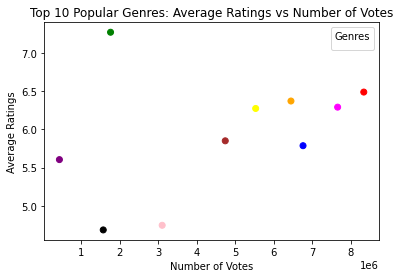

In [129]:
# Create scatter plot
plt.scatter(num_votes_top_10, average_ratings_top_10, c= genre_colors)
plt.xlabel('Number of Votes')
plt.ylabel('Average Ratings')
plt.title('Top 10 Popular Genres: Average Ratings vs Number of Votes')
# Generate legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Create legend with handles and labels
plt.legend(handles, labels, title='Genres')
plt.show()

Just to be clear... this is a list of what the colors in te above scatter plot represent
-  red = Drama
- green = Documentary
- blue = Comedy
- purple = Comedy,Drama
- orange = Horror
- black = Drama,Romance
- magenta = Thriller
- yellow = Comedy,Drama,Romance
- brown = Comedy,Romance
- pink = Horror,Thriller

__3.Gross and Domestic Income Analysis__

__Lets create a new df... that has the movies_df and the movies_gross_df concatenated__


Here the point is to analyse the incomes different genres gain

In [78]:
new_df = movies_df.merge(movies_gross_df, on='primary_title', how='inner')
new_df.head(5)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013


In [79]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2973 entries, 0 to 2972
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         2973 non-null   object 
 1   primary_title    2973 non-null   object 
 2   original_title   2973 non-null   object 
 3   start_year       2973 non-null   int64  
 4   runtime_minutes  2973 non-null   float64
 5   genres           2973 non-null   object 
 6   averagerating    2973 non-null   float64
 7   numvotes         2973 non-null   int64  
 8   studio           2970 non-null   object 
 9   domestic_gross   2951 non-null   float64
 10  foreign_gross    1788 non-null   object 
 11  year             2973 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 301.9+ KB


In [81]:
#lets clean our new df to work with complete data... we will drop the null values in the foreign_gross and domestic_gross
new_df= new_df.dropna(subset= ['foreign_gross'])
new_df.head(5)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
5,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014


In [82]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1788 entries, 1 to 2972
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         1788 non-null   object 
 1   primary_title    1788 non-null   object 
 2   original_title   1788 non-null   object 
 3   start_year       1788 non-null   int64  
 4   runtime_minutes  1788 non-null   float64
 5   genres           1788 non-null   object 
 6   averagerating    1788 non-null   float64
 7   numvotes         1788 non-null   int64  
 8   studio           1786 non-null   object 
 9   domestic_gross   1766 non-null   float64
 10  foreign_gross    1788 non-null   object 
 11  year             1788 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 181.6+ KB


In [85]:
#we still have some nulls in the domestic_gross... lets drop them
new_df= new_df.dropna(subset= ['domestic_gross'])
new_df.head(5)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
5,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014


In [86]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1766 entries, 1 to 2972
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         1766 non-null   object 
 1   primary_title    1766 non-null   object 
 2   original_title   1766 non-null   object 
 3   start_year       1766 non-null   int64  
 4   runtime_minutes  1766 non-null   float64
 5   genres           1766 non-null   object 
 6   averagerating    1766 non-null   float64
 7   numvotes         1766 non-null   int64  
 8   studio           1766 non-null   object 
 9   domestic_gross   1766 non-null   float64
 10  foreign_gross    1766 non-null   object 
 11  year             1766 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 179.4+ KB


In [87]:
#genres count in the new df
genres_num

Drama                      10189
Documentary                 9149
Comedy                      4604
Comedy,Drama                2451
Horror                      2232
                           ...  
Crime,Drama,News               1
Action,Crime,Music             1
Adventure,Crime,Romance        1
Comedy,Sci-Fi,Sport            1
Drama,Music,News               1
Name: genres, Length: 906, dtype: int64

In [99]:

top_5_popular_genres = genres_num.head(5).index.tolist()
top_5_popular_genres

['Drama', 'Documentary', 'Comedy', 'Comedy,Drama', 'Horror']

__Total Domestic Gross Income__

In [100]:
#lets create a list of the sum of domestic incomes that each genre holds
#create an empty list
total_gen_domestic_income= []


#iterate over the  genre to find total votes
for genres in new_df['genres'].unique():
    #see the movies in the current genre only
    genres_current= new_df[new_df['genres'] == genres]
    
    #calculate number of votes
    total_domestic_income= genres_current['domestic_gross'].sum()
    
    total_gen_domestic_income.append(total_domestic_income)
    
total_gen_domestic_income[:5]

[9307000.0, 2411593998.0, 488473400.0, 1003901600.0, 11022499999.0]

In [ ]:
top_10_popular_genres = genres_num.head(10).index.tolist()
top_10_popular_genres

Lets plot a bar graph that will show the respective genres and their respective domestic gross income

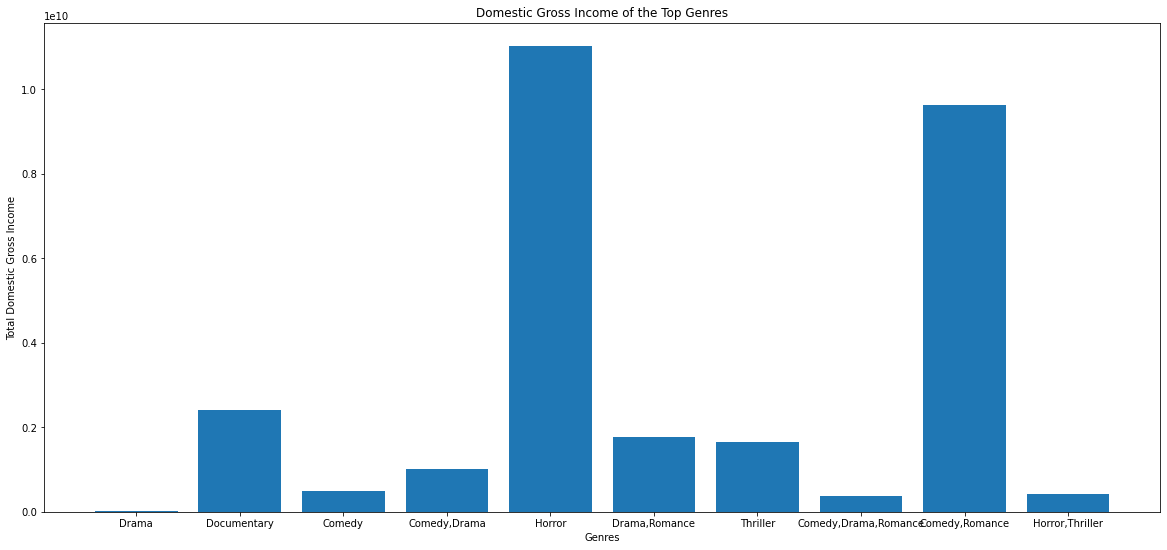

In [177]:
#its a bar chart
fig, ax = plt.subplots(figsize=(20, 9))
ax.bar(top_10_popular_genres,total_gen_domestic_income[:10])
plt.xlabel('Genres')
plt.ylabel('Total Domestic Gross Income')
plt.title('Domestic Gross Income of the Top Genres')
plt.show()

__Total Foreign Gross__

In [164]:
#lets create a list of the sum of domestic incomes that each genre holds
#create an empty list
total_gen_foreign_income= []


#iterate over the  genre to find total votes
for genres in new_df['genres'].unique():
    #see the movies in the current genre only
    genres_current= new_df[new_df['genres'] == genres]
    # Convert 'foreign_gross' column to numeric data type (float) using .loc
    genres_current.loc[:, 'foreign_gross'] = pd.to_numeric(genres_current['foreign_gross'], errors='coerce')
    
    #calculate number of votes
    total_foreign_income= genres_current['foreign_gross'].sum()
    #number_of_movies2= len(genres_current)
    #average_foreign_income = total_foreign_income/number_of_movies2
    
    total_gen_foreign_income.append(total_foreign_income)
    
total_gen_foreign_income[:5]

[16100000, 3099462198, 762500000, 1162212000, 16611400000.0]

In [ ]:
top_10_popular_genres = genres_num.head(10).index.tolist()
top_10_popular_genres

Lets plot a bar graph that will show the respective genres and their respective domestic gross income

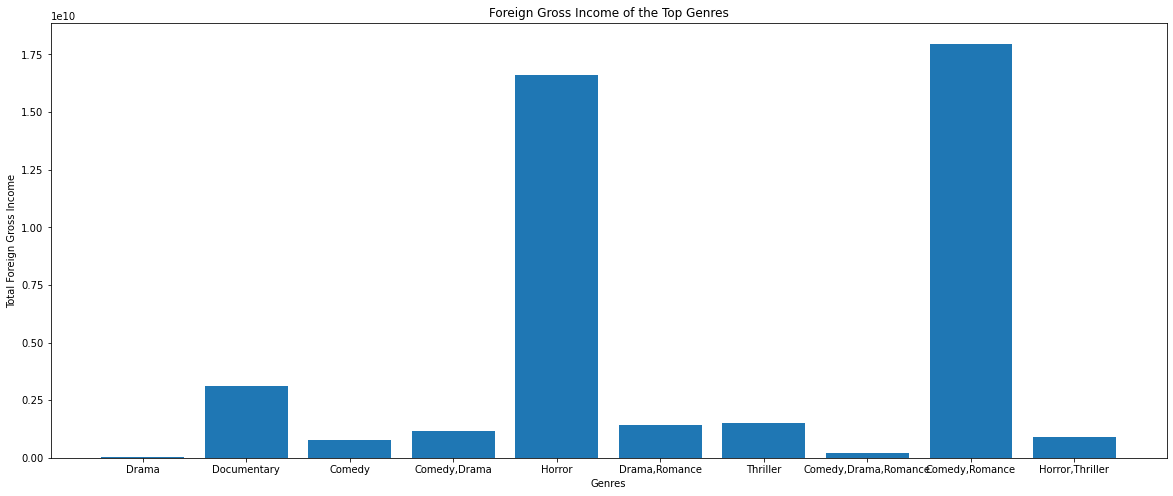

In [180]:
#its a bar chart
fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(top_10_popular_genres,total_gen_foreign_income[:10])
plt.xlabel('Genres')
plt.ylabel('Total Foreign Gross Income')
plt.title('Foreign Gross Income of the Top Genres')
plt.show()

__4. Movie Trend Analysis__

In this part we will use the movies_df to evaluate the trend of different genre release over the years. we will achieve this by having line plots that show the movie release trends in the different genres


In [131]:
top_10_popular_genre

['Drama',
 'Documentary',
 'Comedy',
 'Comedy,Drama',
 'Horror',
 'Drama,Romance',
 'Thriller',
 'Comedy,Drama,Romance',
 'Comedy,Romance',
 'Horror,Thriller']

In [132]:
# lets find the top 5 frequencies and add them to a separate list
top_gen_freq = genres_num.head(10).tolist()
top_gen_freq

[10189, 9149, 4604, 2451, 2232, 1392, 1288, 1159, 1128, 943]

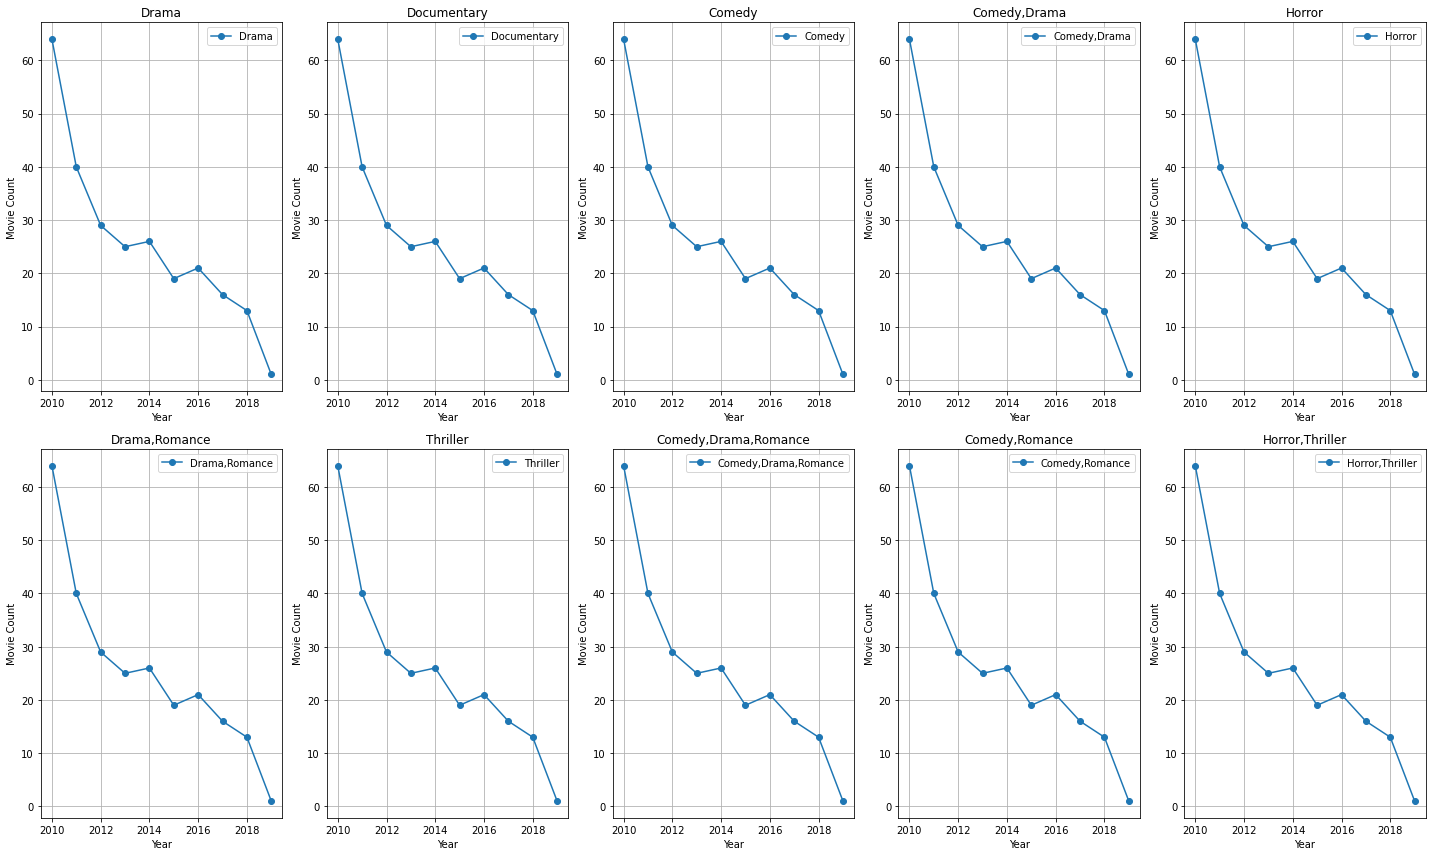

In [153]:

# Create subplots with 2 rows and 5 columns to accommodate 10 genres
fig, axes = plt.subplots(2, 5, figsize=(20, 12))
# Flatten the axes array to make it easier to loop through
axes = axes.flatten()

# Loop through the top genres and create line plots
for i, genre in enumerate(top_10_popular_genres):
    # Filter data for current genre
    genre_data = new_df[new_df['genres'].str.contains(genres)]
    # Group by year and get count of movies for current genre
    genre_counts = genre_data.groupby('start_year').size()
    # Plot line graph for current genre
    axes[i].plot(genre_counts.index, genre_counts.values, marker='o', label=genre)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Movie Count')
    axes[i].set_title(genre)
    axes[i].legend()
    axes[i].grid()
# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

__Analysis Findings and Recommendation__

There are many factors that affect the success of a movie. Our analysis covers some of the factors to enable Microsoft Studio to understand the best way to venture into the movie industry.
1. Genres Analysis
From the genre analysis, we saw that there is a vast distribution of movies across different genres. However, the goal was to understand which genre has the most movie productions in them. This is because we need to find the popular genres in order to suggest the best genres to suggest to Microsoft Studio. The top ten genres show that they have high movie production
2. Rating and Votes Analysis
We went ahead to figure out the relationship between the average ratings and total number of votes across each genre. From our analysis we note a certain trend which is, the movies with the highest number of votes are just above average in the average ratings, while the movies with the minimal votes have the highest votes... This is to say that the audience reception of the movies in the great, the engagement is high and it would be a great idea to make movie productions that are in line with the top ten most popular genres. This will give the company high audience engagement that equals high income
3. Domestic and Foreign Income Analysis
From this analysis we have seen that the most Domestic income generating genre is the 'Horror' while the genre that generates the most foreign income is the 'Comedy, Romance'; this is from the top ten most popular genres

Given the above Analysis Factors I would recomend the following;
- Microsoft studio should choose the following genres 'Horror' , 'Comedy,Drama', 'Documentary', 'Drama, Romance' and 'Thriller'
- Choosing these genres will ensure that the company makes great returns both in audience reception and income
- From my analysis, I would advice the company stakeholers to invest more money in the production of movies to ensure that the audience engagement is at its best, we would like to have more views of our movies as well as high rates

Thank you!